In [1]:
import os
os.chdir('C:/Users/user/Downloads')

In [2]:
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import docx

# Load the Excel file
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_India.xlsx'
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

In [5]:
import docx

In [3]:
df

,Unnamed: 0,India_8,India_36,India_40,India_67,India_69,India_124,India_136,India_153,India_160,India_172,India_199,India_206,India_220,Date,Unnamed: 15,Unnamed: 16,Date.1,India_8.1
0,0,105.0,133.0,105.00,187.50,187.50,65.0,100.5,135.00,110.5,NaN,NaN,610.0,213.0,2010-01-01,NaN,NaN,2010-01-01,105.0
1,1,105.0,129.5,105.00,187.66,187.66,63.5,101.5,135.00,107.5,NaN,NaN,610.0,213.0,2010-01-04,NaN,NaN,2010-01-04,105.0
2,2,105.0,122.0,105.00,180.00,180.00,60.0,91.5,130.00,101.5,NaN,NaN,575.5,204.5,2010-01-05,NaN,NaN,2010-01-05,105.0
3,3,105.0,122.0,105.00,181.50,181.50,60.0,90.5,130.00,101.5,NaN,NaN,567.5,204.5,2010-01-06,NaN,NaN,2010-01-06,105.0
4,4,100.0,120.5,100.00,177.33,177.33,59.0,88.0,130.00,100.0,NaN,NaN,567.5,203.0,2010-01-07,NaN,NaN,2010-01-07,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,3660,NaN,NaN,44.32,76.61,NaN,NaN,22.5,51.29,NaN,46.30,144.0,NaN,NaN,2024-01-12,NaN,NaN,2024-01-12,NaN
3661,3661,NaN,NaN,44.29,76.61,NaN,NaN,22.5,51.28,NaN,46.29,144.0,NaN,NaN,2024-01-15,NaN,NaN,2024-01-15,NaN
3662,3662,NaN,NaN,44.26,52.27,NaN,NaN,22.5,51.24,NaN,46.24,144.0,NaN,NaN,2024-01-16,NaN,NaN,2024-01-16,NaN
3663,3663,NaN,NaN,44.27,52.30,NaN,NaN,22.5,52.28,NaN,47.28,144.0,NaN,NaN,2024-01-17,NaN,NaN,2024-01-17,NaN


In [4]:
excel_file2 = 'Tests.xlsx'
sheet_name2 = 'Kept_Regressors'
regressors_df = pd.read_excel(excel_file2, sheet_name=sheet_name2)

In [5]:
regressors_df

,Exog_Names,India_8,India_36,India_40,India_67,India_69,India_124,India_136,India_153,India_160,...,China_33,China_103,China_165,China_169,China_203,China_209,China_213,China_228,China_250,China_265
0,Price_India_5-Year_Bond,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Price_BRENT,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
2,Price_BSE-500,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Price_EUR_INR,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Price_USD_INR,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,Price_GAS,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,0,1
6,Price_GOLD,0,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
7,Price_China_5-Year_Bond,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,1
8,Price_CSI_300,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,1,0,1
9,Price_EUR_CNY,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [7]:
excel_file3 = 'corrected_series_exog.xlsx'
exog_df = pd.read_excel(excel_file3, sheet_name=Sheet1)

exog_df

,Unnamed: 0,Price_China_5-Year_Bond,Price_India_5-Year_Bond,Price_CSI_300,Price_BRENT,Price_BSE-500,Price_EUR_CNY,Price_USD_CNY,Price_EUR_INR,Price_USD_INR,Price_GAS,Price_GOLD,Date
0,0,2.980,7.253,3535.23,80.12,6903.629883,9.8423,6.8285,66.7295,46.295,5884,1118.30,2010-01-01
1,1,2.980,7.253,3535.23,80.12,6903.629883,9.8423,6.8285,66.7295,46.295,5884,1118.30,2010-01-04
2,2,2.950,7.211,3564.04,80.59,6974.490234,9.8091,6.8268,66.3900,46.205,5637,1118.70,2010-01-05
3,3,2.950,7.241,3541.73,81.89,6994.149902,9.8413,6.8278,65.8645,45.695,6009,1136.50,2010-01-06
4,4,2.980,7.266,3471.46,81.51,6971.419922,9.7764,6.8281,65.3525,45.650,5806,1133.70,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,3660,2.409,7.058,3284.17,78.29,31215.689453,7.8466,7.1665,90.7200,82.857,3313,2061.10,2024-01-12
3661,3661,2.418,7.023,3280.92,78.15,31440.699219,7.8509,7.1711,90.6790,82.827,3066,2057.85,2024-01-15
3662,3662,2.431,7.021,3300.88,78.29,31346.189453,7.8186,7.1902,90.3460,83.084,2900,2039.70,2024-01-16
3663,3663,2.408,7.039,3229.08,77.88,30808.230469,7.8300,7.1960,90.5100,83.182,2870,2015.90,2024-01-17


In [8]:
# Create a dictionary to map CDS spread names to their exogenous variables
exog_vars_dict = {}
for column in regressors_df.columns[1:]:
    spread_name = column
    exog_vars = list(regressors_df.loc[regressors_df[column] == 1, 'Exog_Names'])
    exog_vars_dict[spread_name] = exog_vars

In [9]:
exog_vars_dict

{'India_8': ['Price_BRENT', 'Price_BSE-500', 'Price_EUR_INR', 'Price_USD_INR'],
 'India_36': ['Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_40': ['Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_67': ['Price_India_5-Year_Bond',
  'Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_69': ['Price_India_5-Year_Bond',
  'Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_124': ['Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR',
  'Price_GOLD'],
 'India_136': ['Price_BRENT', 'Price_EUR_INR', 'Price_USD_INR', 'Price_GOLD'],
 'India_153': ['Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  'Price_USD_INR'],
 'India_160': ['Price_BRENT', 'Price_EUR_INR', 'Price_USD_INR', 'Price_GOLD'],
 'India_172': ['Price_India_5-Year_Bond',
  'Price_BRENT',
  'Price_BSE-500',
  'Price_EUR_INR',
  '

In [6]:
# Чтобы не мучиться

chosen_lags = {'India_8': 3, 'India_36': 3, 'India_40': 5, 'India_67': 4, 'India_69': 4, 'India_124': 3, 'India_136': 3, 'India_153': 6, 'India_160': 3, 'India_172': 4, 'India_199': 6, 'India_206': 3, 'India_220': 3}


Evaluating column: India_8
Exogenous variables for India_8: Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR
India_8 ARIMA(0,1,0) Metrics:
RMSE: 3.4065, MAE: 0.9115, MAPE: 0.7089
India_8 ARIMA(3,1,0) Metrics:
RMSE: 3.2821, MAE: 1.2324, MAPE: 1.0411
Better model for India_8: ARIMA(0,1,0)


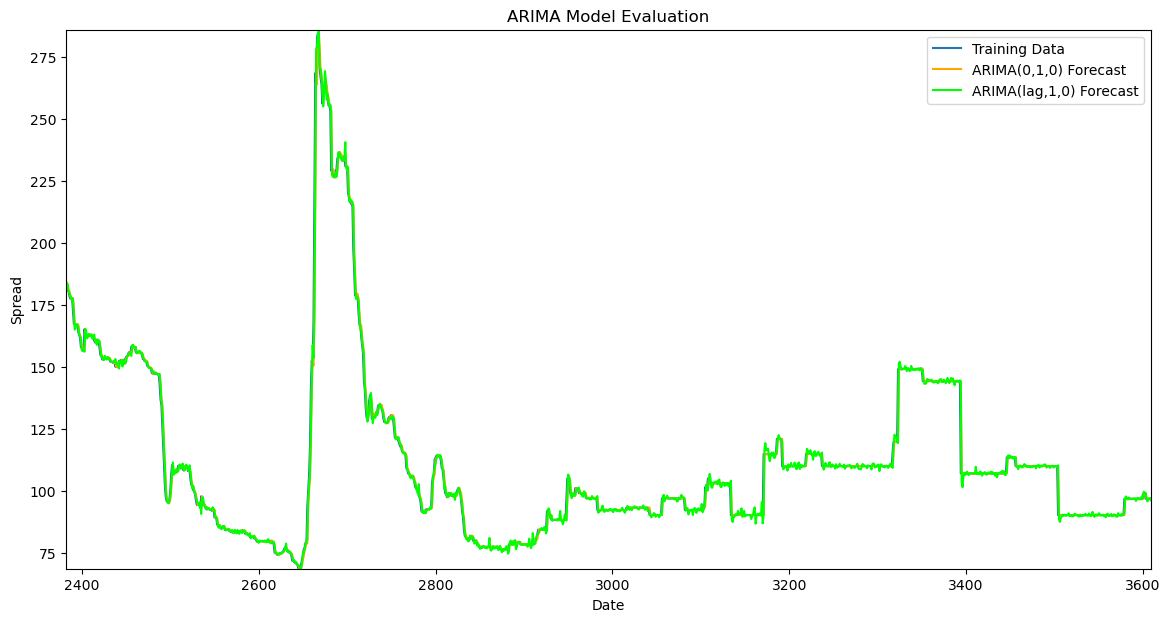


Evaluating column: India_36
Exogenous variables for India_36: Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR, Price_GOLD
India_36 ARIMA(0,1,0) Metrics:
RMSE: 6.0377, MAE: 2.5055, MAPE: 1.1624
India_36 ARIMA(3,1,0) Metrics:
RMSE: 5.6248, MAE: 3.0842, MAPE: 1.5045
Better model for India_36: ARIMA(0,1,0)


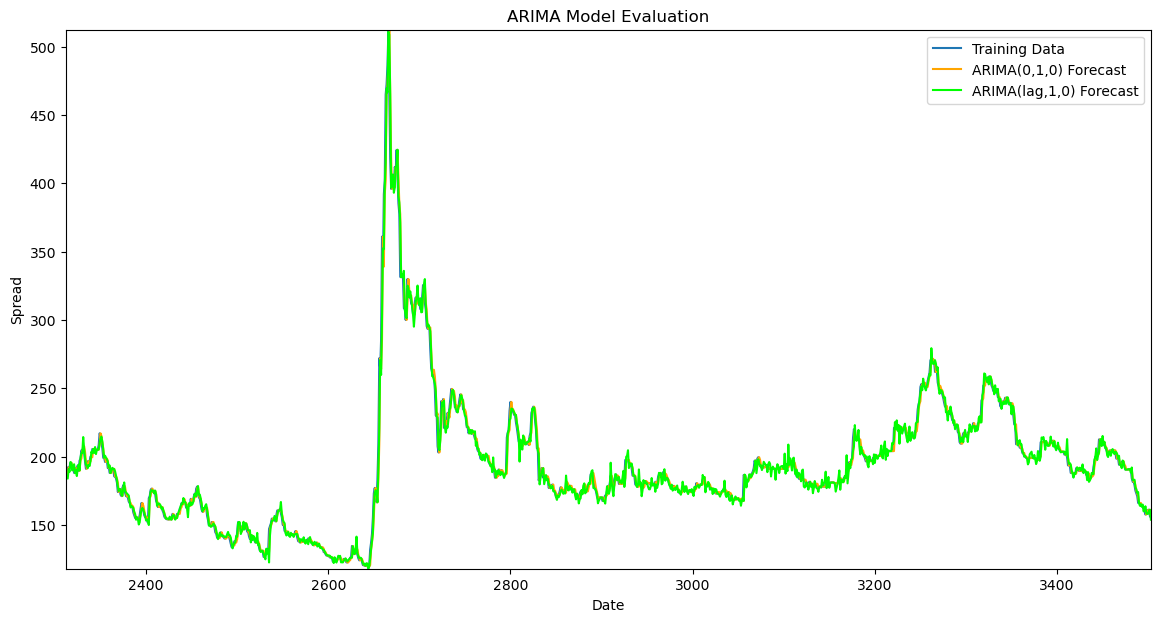


Evaluating column: India_40
Exogenous variables for India_40: Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR, Price_GOLD
India_40 ARIMA(0,1,0) Metrics:
RMSE: 3.1783, MAE: 1.0515, MAPE: 1.0351
India_40 ARIMA(5,1,0) Metrics:
RMSE: 3.0515, MAE: 1.2444, MAPE: 1.2801
Better model for India_40: ARIMA(0,1,0)


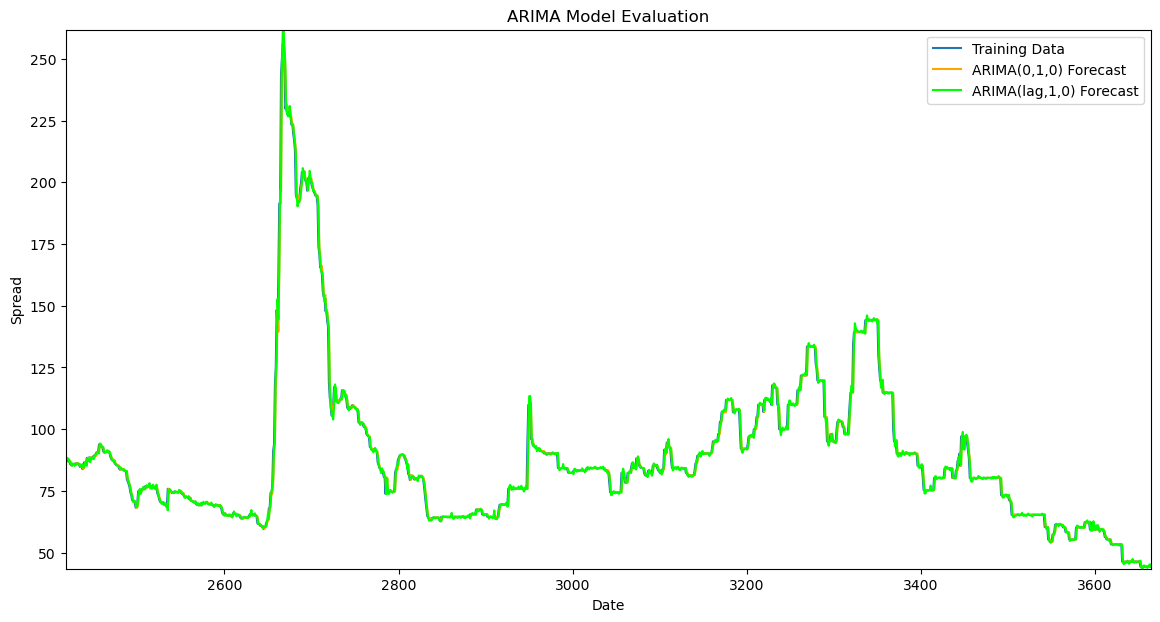


Evaluating column: India_67
Exogenous variables for India_67: Price_India_5-Year_Bond, Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR, Price_GOLD
India_67 ARIMA(0,1,0) Metrics:
RMSE: 4.0946, MAE: 1.0991, MAPE: 0.9148
India_67 ARIMA(4,1,0) Metrics:
RMSE: 4.0868, MAE: 1.5055, MAPE: 1.3242
Better model for India_67: ARIMA(0,1,0)


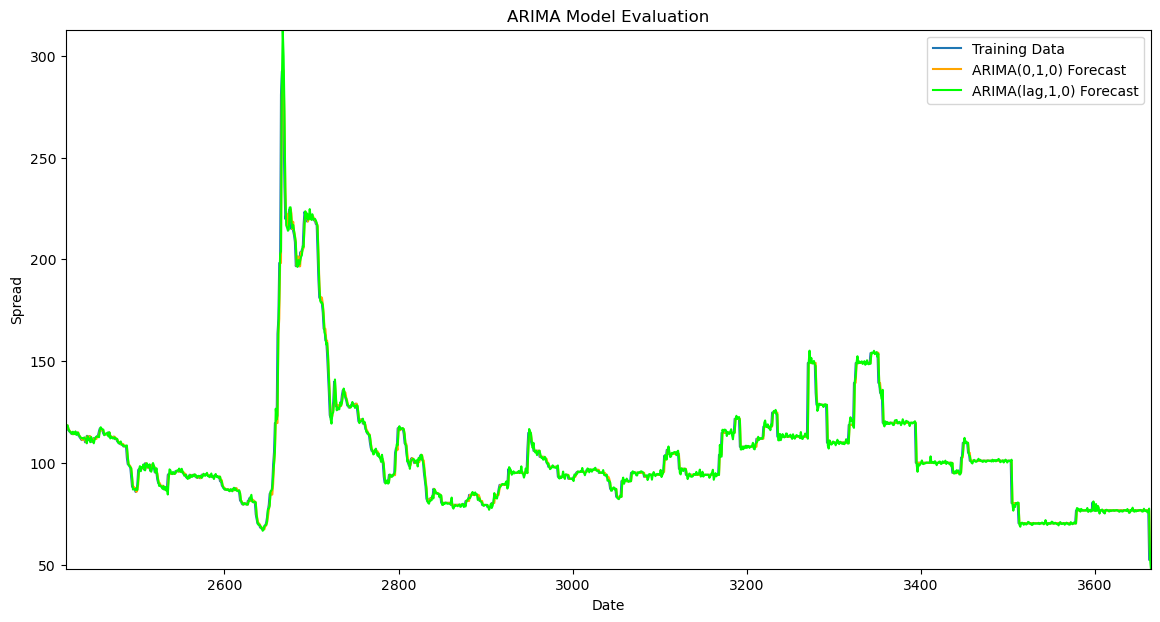


Evaluating column: India_69
Exogenous variables for India_69: Price_India_5-Year_Bond, Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR, Price_GOLD
India_69 ARIMA(0,1,0) Metrics:
RMSE: 4.4244, MAE: 1.6406, MAPE: 1.4377
India_69 ARIMA(4,1,0) Metrics:
RMSE: 4.3573, MAE: 1.8369, MAPE: 1.6314
Better model for India_69: ARIMA(0,1,0)


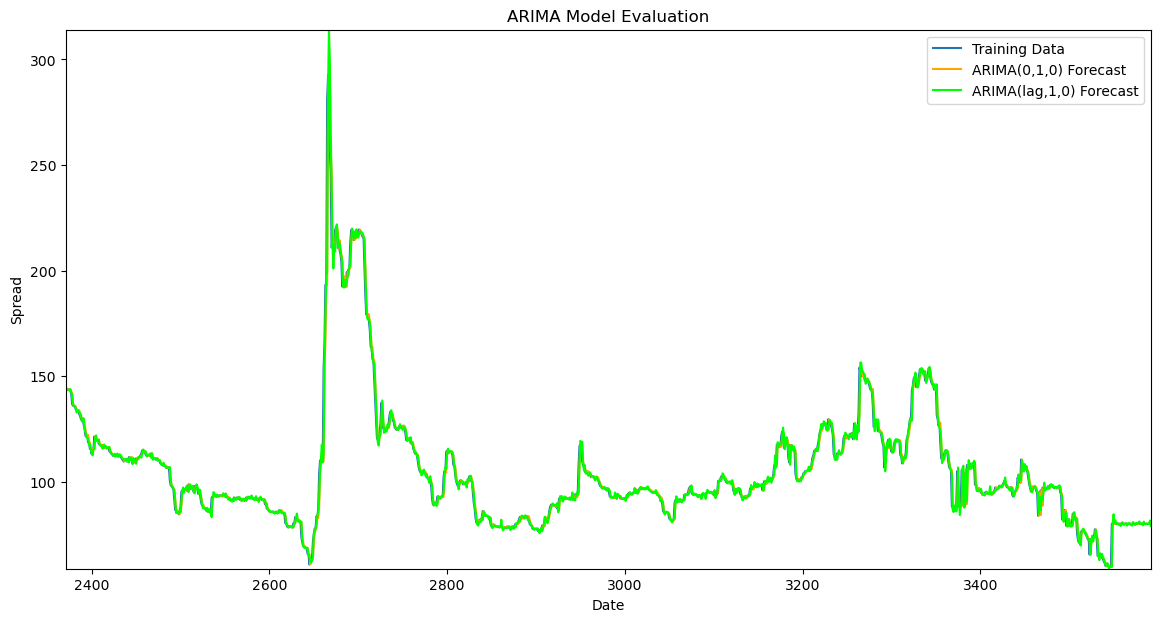


Evaluating column: India_124
Exogenous variables for India_124: Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR, Price_GOLD
India_124 ARIMA(0,1,0) Metrics:
RMSE: 1.1934, MAE: 0.5327, MAPE: 1.2668
India_124 ARIMA(3,1,0) Metrics:
RMSE: 1.1549, MAE: 0.7178, MAPE: 1.7911
Better model for India_124: ARIMA(0,1,0)


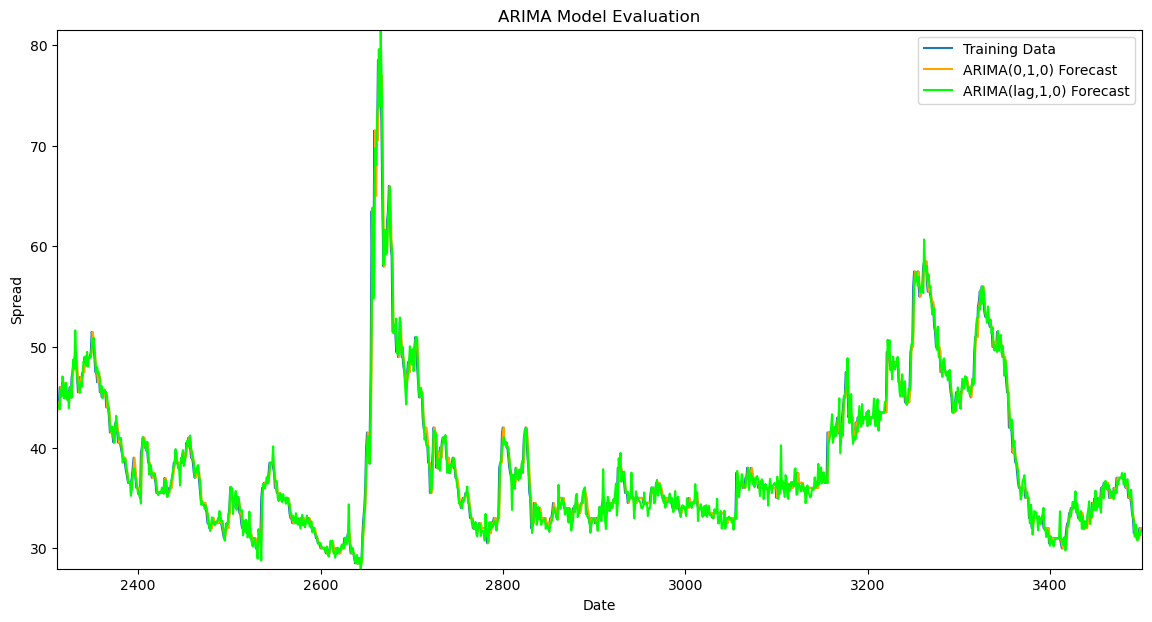


Evaluating column: India_136
Exogenous variables for India_136: Price_BRENT, Price_EUR_INR, Price_USD_INR, Price_GOLD
India_136 ARIMA(0,1,0) Metrics:
RMSE: 2.0866, MAE: 0.9515, MAPE: 1.8641
India_136 ARIMA(3,1,0) Metrics:
RMSE: 2.1618, MAE: 1.2204, MAPE: 2.5954
Better model for India_136: ARIMA(0,1,0)


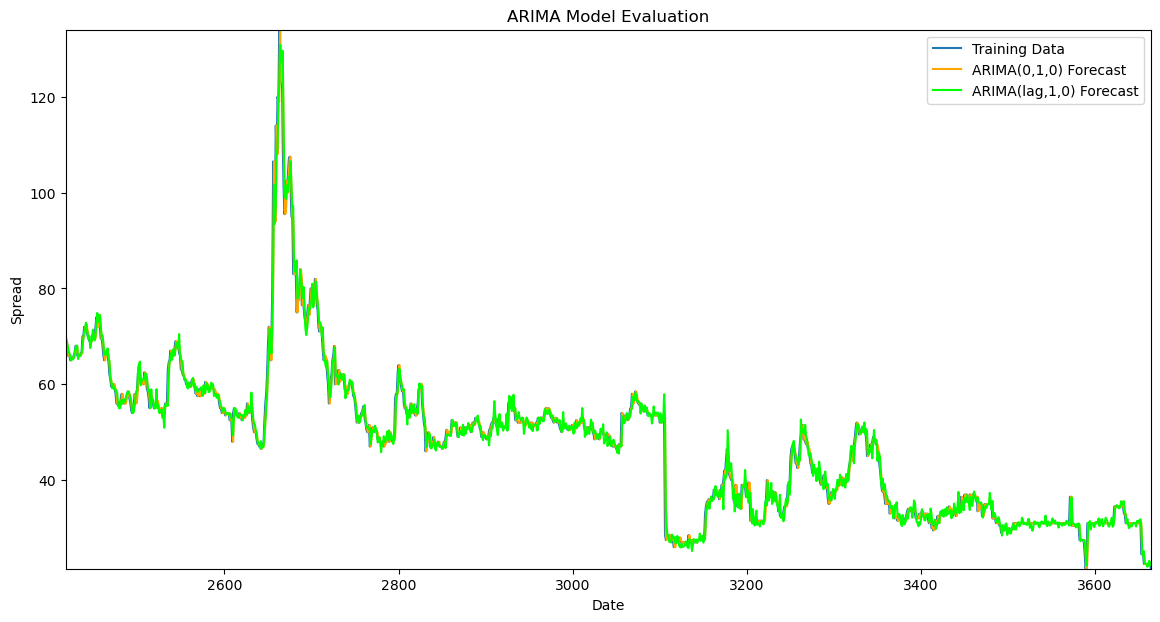


Evaluating column: India_153
Exogenous variables for India_153: Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR
India_153 ARIMA(0,1,0) Metrics:
RMSE: 3.3818, MAE: 1.2497, MAPE: 1.1077
India_153 ARIMA(6,1,0) Metrics:
RMSE: 3.2356, MAE: 1.4725, MAPE: 1.3941
Better model for India_153: ARIMA(0,1,0)


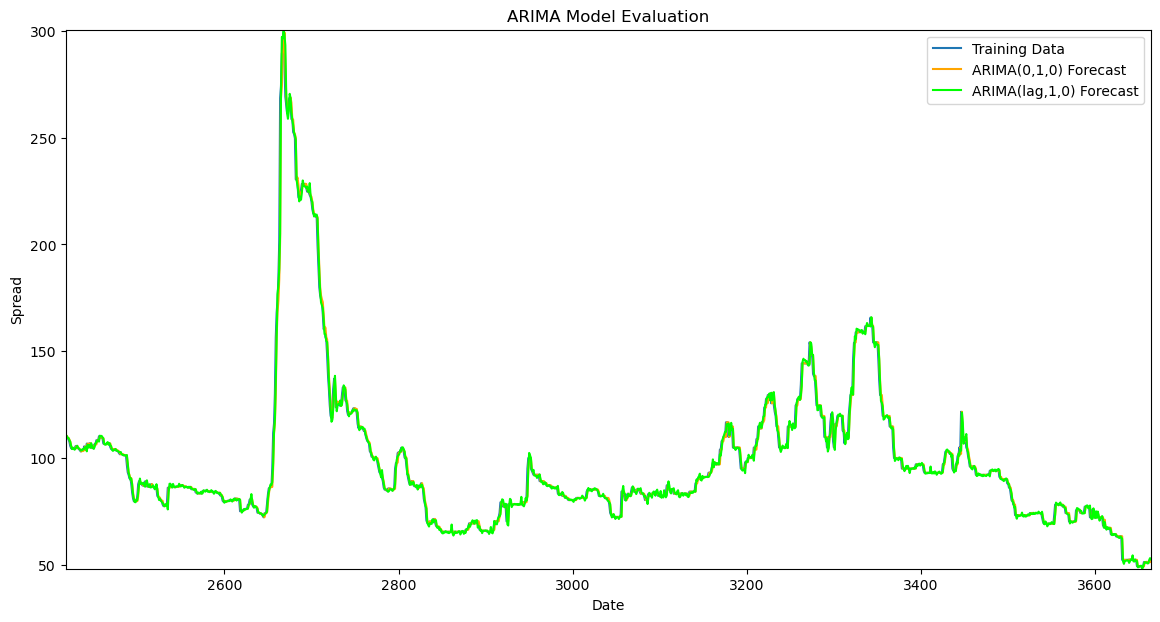


Evaluating column: India_160
Exogenous variables for India_160: Price_BRENT, Price_EUR_INR, Price_USD_INR, Price_GOLD
India_160 ARIMA(0,1,0) Metrics:
RMSE: 5.6292, MAE: 1.8417, MAPE: 1.5917
India_160 ARIMA(3,1,0) Metrics:
RMSE: 5.6413, MAE: 2.1733, MAPE: 1.9443
Better model for India_160: ARIMA(0,1,0)


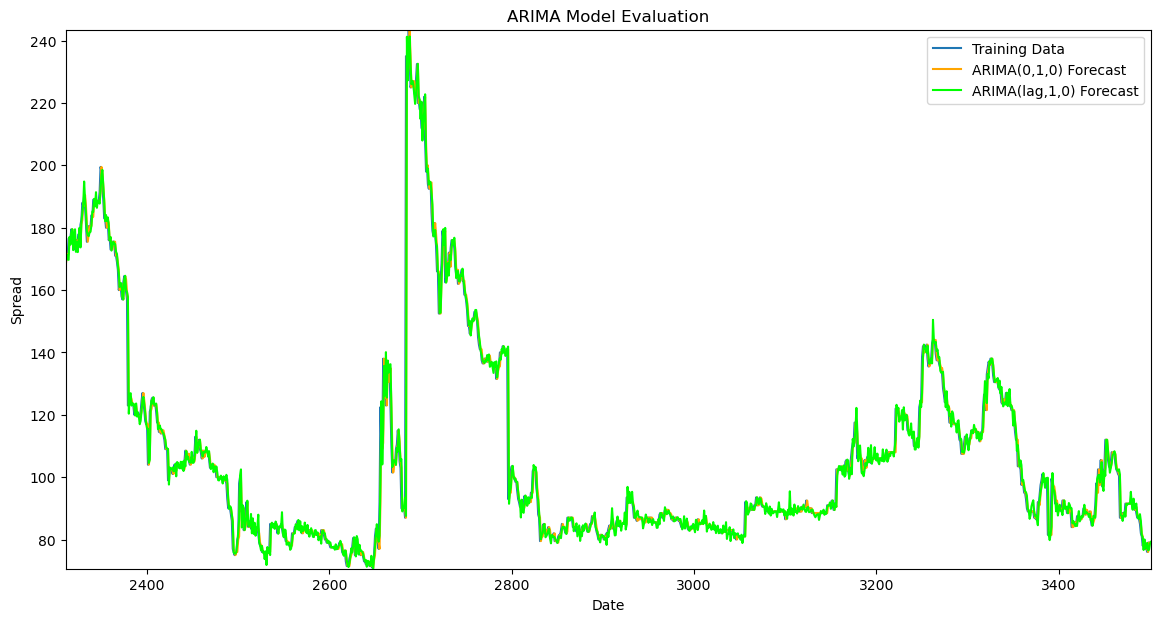


Evaluating column: India_172
Exogenous variables for India_172: Price_India_5-Year_Bond, Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR


KeyboardInterrupt: 

In [8]:
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel files
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_India.xlsx'
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

excel_file2 = 'Tests.xlsx'
sheet_name2 = 'Kept_Regressors'
regressors_df = pd.read_excel(excel_file2, sheet_name=sheet_name2)

excel_file3 = 'corrected_series_exog.xlsx'
exog_df = pd.read_excel(excel_file3, sheet_name=Sheet1)

# Create a dictionary to map CDS spread names to their exogenous variables
exog_vars_dict = {}
for column in regressors_df.columns[1:]:
    spread_name = column
    exog_vars = list(regressors_df.loc[regressors_df[column] == 1, 'Exog_Names'])
    exog_vars_dict[spread_name] = exog_vars

chosen_lags = {'India_8': 3, 'India_36': 3, 'India_40': 5, 'India_67': 4, 'India_69': 4, 'India_124': 3, 'India_136': 3, 'India_153': 6, 'India_160': 3, 'India_172': 4, 'India_199': 6, 'India_206': 3, 'India_220': 3}

# Function to calculate MAPE
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Dictionaries to store fitted models and forecasts for each column
all_fitted_models = {}
all_forecasts = {}

# Create an empty DataFrame to store metrics
metrics_df = []

# Iterate over columns and compare models
for column in df.columns[1:14]:
    if column in chosen_lags:
        print(f"\nEvaluating column: {column}")
        series = df[column]
        column_name = column

        # Get the list of exogenous variables for the current CDS spread
        exog_vars = exog_vars_dict.get(column_name, [])
        print(f"Exogenous variables for {column_name}: {', '.join(exog_vars)}")

        # Function to evaluate and compare models
        start_index = series.first_valid_index()
        end_index = series.last_valid_index()
        series = series.loc[start_index:end_index]
        series = series.reset_index(drop=True)

        # Subset the exogenous variable columns to match the length of the CDS spread series
        exog_data = exog_df[exog_vars].loc[start_index:end_index]
        exog_data = exog_data.reset_index(drop=True)

        size = int(len(series) * 0.66)
        train, test = series[0:size], series[size:len(series)]
        history = [x for x in train]
        exog_history = exog_data.iloc[:size].values.tolist()

        rw_predictions = list()
        arima_predictions = list()
        test_data = list(test)

        # Walk-forward validation
        for t in range(len(test)):
            # Evaluate ARIMA(0,1,0) model
            rw_model = ARIMA(history, order=(0, 1, 0))
            rw_model_fit = rw_model.fit()
            rw_output = rw_model_fit.forecast()
            rw_yhat = rw_output[0]
            rw_predictions.append(rw_yhat)

            # Evaluate ARIMA(x,1,0) model with exogenous variables
            lag = chosen_lags.get(column_name, 1)
            arima_model = ARIMA(history, order=(lag, 1, 0), exog=exog_history)
            arima_model_fit = arima_model.fit(method_kwargs={"warn_convergence": False})
            arima_output = arima_model_fit.forecast(exog=exog_data.iloc[size + t:size + t + 1].values)
            arima_yhat = arima_output[0]
            arima_predictions.append(arima_yhat)

            obs = test[t + len(train)]
            history.append(obs)
            exog_history.append(exog_data.iloc[size + t].values.tolist())

        # Evaluate forecasts
        rw_rmse = sqrt(mean_squared_error(test, rw_predictions))
        arima_rmse = sqrt(mean_squared_error(test, arima_predictions))
        rw_mae = mean_absolute_error(test, rw_predictions)
        arima_mae = mean_absolute_error(test, arima_predictions)
        rw_mape = mape(test, rw_predictions)
        arima_mape = mape(test, arima_predictions)

        # Inside the compare_models function, after calculating metrics
        metrics_df.append({
            'Column': column_name,
            'Model': 'ARIMA(0,1,0)',
            'RMSE': rw_rmse,
            'MAE': rw_mae,
            'MAPE': rw_mape
        })

        metrics_df.append({
            'Column': column_name,
            'Model': f'ARIMA({lag},1,0)',
            'RMSE': arima_rmse,
            'MAE': arima_mae,
            'MAPE': arima_mape
        })
        

        # Compare models
        
        # Compare models based on all metrics
        rw_better_count = 0
        arima_better_count = 0
        
        if rw_rmse < arima_rmse:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mae < arima_mae:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mape < arima_mape:
            rw_better_count += 1
        else:
            arima_better_count += 1
            
        if rw_better_count > arima_better_count:
            better_model = "ARIMA(0,1,0)"
        elif arima_better_count > rw_better_count:
            better_model = f"ARIMA({lag},1,0)"
        else:
            better_model = "No clear winner"
            
        # Print forecast metrics and the better model
        print(f"{column_name} ARIMA(0,1,0) Metrics:")
        print(f"RMSE: {rw_rmse:.4f}, MAE: {rw_mae:.4f}, MAPE: {rw_mape:.4f}")
        print(f"{column_name} ARIMA({lag},1,0) Metrics:")
        print(f"RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, MAPE: {arima_mape:.4f}")
        print(f"Better model for {column_name}: {better_model}")
    
        # Store fitted models and forecasts for the current columns
        fitted_models = {'rw_model': rw_model_fit, 'arima_model': arima_model_fit}
        forecasts = {'rw_predictions': rw_predictions, 'arima_predictions': arima_predictions, 'test_data': test_data}
        all_fitted_models[column_name] = fitted_models
        all_forecasts[column_name] = forecasts

        # Create a plot to compare the forecast with the actual test data
        plt.figure(figsize=(14, 7))
        plt.plot(series, label='Training Data')
        # Create Series objects for the predictions
        test_forecast_series_rw = pd.Series(rw_predictions, index=test.index)
        test_forecast_series_arima = pd.Series(arima_predictions, index=test.index)
        # Determine the relevant range for zooming
        x_min, x_max = test.index.min(), test.index.max()
        y_min, y_max = min(test.min(), test_forecast_series_rw.min(), test_forecast_series_arima.min()), max(test.max(), test_forecast_series_rw.max(), test_forecast_series_arima.max())
        # Plot the data
        plt.plot(test_forecast_series_rw, label='ARIMA(0,1,0) Forecast', color='orange')
        plt.plot(test_forecast_series_arima, label='ARIMA(lag,1,0) Forecast', color='lime')
        # Zoom in on the relevant range
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title('ARIMA Model Evaluation')
        plt.xlabel('Date')
        plt.ylabel('Spread')
        plt.legend()
        plt.show()

In [9]:
metrics_df = pd.DataFrame(metrics_df)

In [10]:
# Export model summaries from all_fitted_models to a Word file
document = docx.Document()
for column_name, models in all_fitted_models.items():
    document.add_heading(f'Column: {column_name}', level=0)
    rw_model_fit = models['rw_model']
    arima_model_fit = models['arima_model']
    lag = chosen_lags.get(column_name, 1)

    document.add_heading('ARIMA(0,1,0) Summary:', level=1)
    document.add_paragraph(str(rw_model_fit.summary()))

    document.add_heading(f'ARIMA({lag},1,0) Summary:', level=1)
    document.add_paragraph(str(arima_model_fit.summary()))

document.save('ARIMA_ex_model_summaries_India.docx') ### country

In [11]:
# After the loop over columns
# Export the metrics DataFrame to an Excel file
metrics_df.to_excel('ARIMA_ex_model_metrics_India.xlsx', index=False) ### country

In [12]:
# After the loop over columns

# Create an empty dictionary to store the reshaped data
reshaped_data = {}

# Loop through each column name (series) in all_forecasts
for column_name, forecasts in all_forecasts.items():
    # Unpack the forecasts for the current column
    rw_predictions, arima_predictions, test_data = forecasts['rw_predictions'], forecasts['arima_predictions'], forecasts['test_data']
    # Create a DataFrame for the current column
    column_df = pd.DataFrame({
        'index': range(len(rw_predictions)),
        f'rw_predictions_{column_name}': rw_predictions,
        f'arima_predictions_{column_name}': arima_predictions,
        f'test_data_{column_name}': test_data
    })

    # Append the DataFrame to the reshaped_data dictionary
    for col in column_df.columns:
        reshaped_data[col] = column_df[col]

In [13]:
forecasts_df = pd.DataFrame(reshaped_data)

# Export the DataFrame to an Excel file
forecasts_df.to_excel('ARIMA_ex_model_forecasts_India.xlsx', index=False) ### country


Evaluating column: India_172
Exogenous variables for India_172: Price_India_5-Year_Bond, Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR
India_172 ARIMA(0,1,0) Metrics:
RMSE: 3.4116, MAE: 1.4355, MAPE: 1.2333
India_172 ARIMA(4,1,0) Metrics:
RMSE: 3.1569, MAE: 1.6187, MAPE: 1.4575
Better model for India_172: ARIMA(0,1,0)


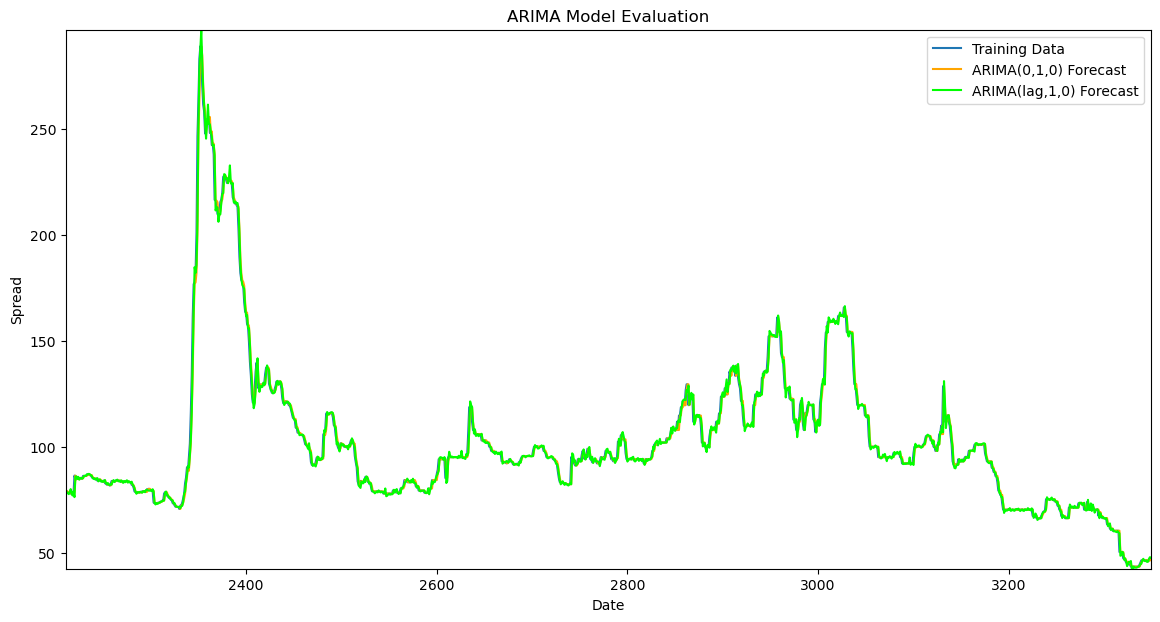


Evaluating column: India_199
Exogenous variables for India_199: Price_BSE-500, Price_USD_INR, Price_GOLD
India_199 ARIMA(0,1,0) Metrics:
RMSE: 7.7292, MAE: 2.2209, MAPE: 2.0404
India_199 ARIMA(6,1,0) Metrics:
RMSE: 8.0220, MAE: 3.2305, MAPE: 3.0840
Better model for India_199: ARIMA(0,1,0)


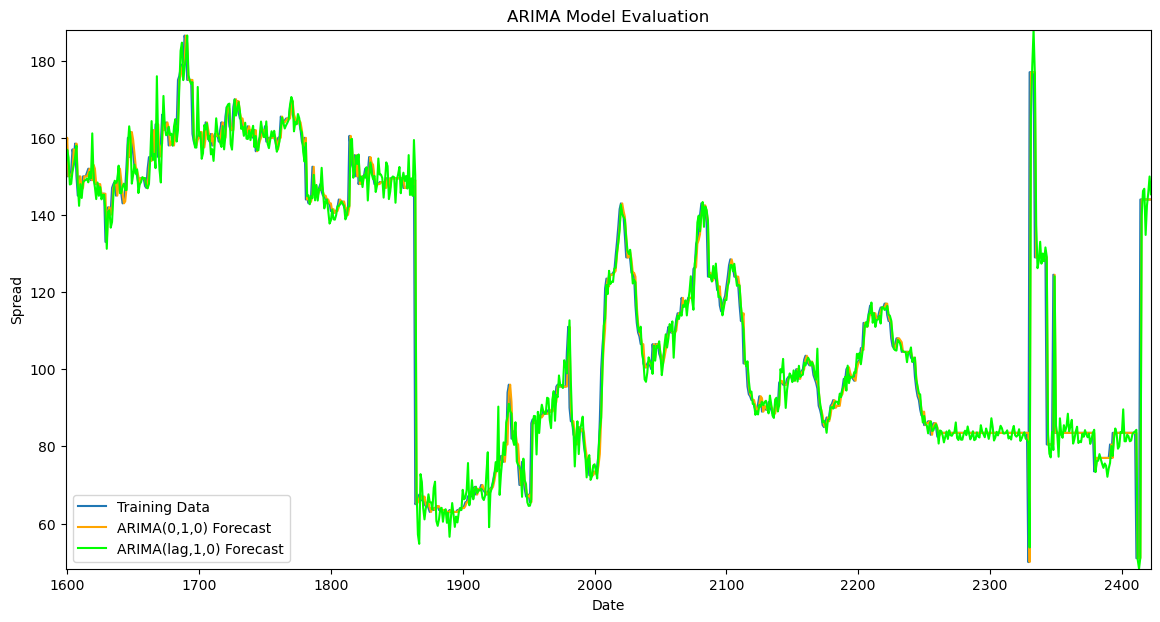


Evaluating column: India_206
Exogenous variables for India_206: Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR, Price_GOLD
India_206 ARIMA(0,1,0) Metrics:
RMSE: 9.6308, MAE: 4.0210, MAPE: 1.2427
India_206 ARIMA(3,1,0) Metrics:
RMSE: 9.1732, MAE: 5.4436, MAPE: 1.8455
Better model for India_206: ARIMA(0,1,0)


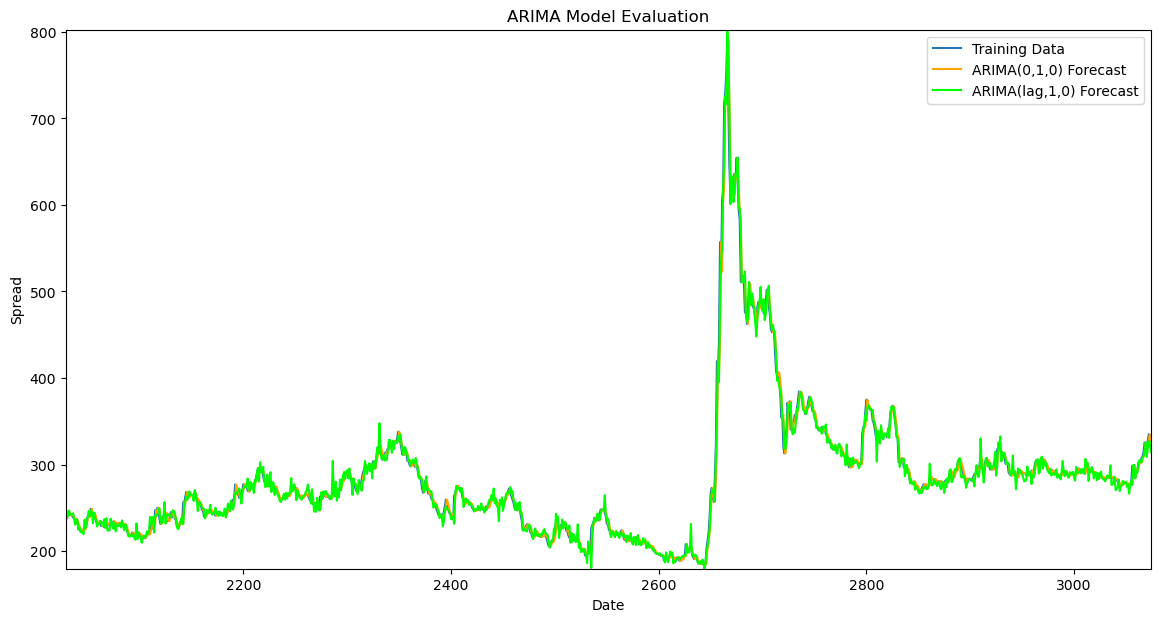


Evaluating column: India_220
Exogenous variables for India_220: Price_BRENT, Price_BSE-500, Price_EUR_INR, Price_USD_INR, Price_GOLD
India_220 ARIMA(0,1,0) Metrics:
RMSE: 3.6723, MAE: 1.5025, MAPE: 1.1141
India_220 ARIMA(3,1,0) Metrics:
RMSE: 3.6544, MAE: 2.2498, MAPE: 1.7875
Better model for India_220: ARIMA(0,1,0)


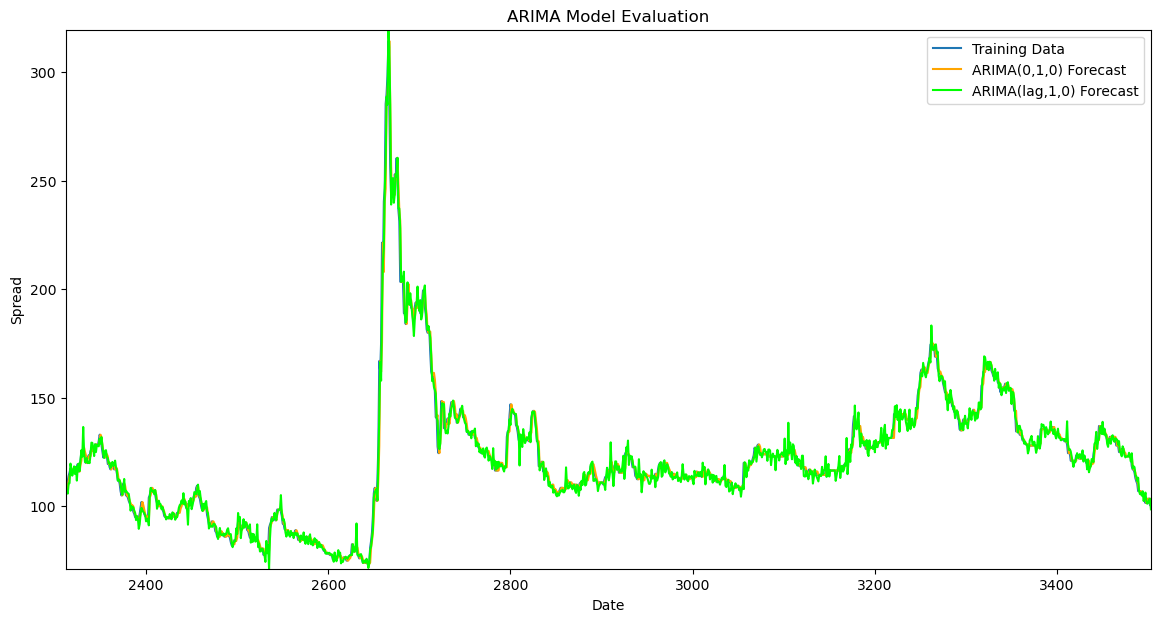

In [2]:
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel files
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_India.xlsx'
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

excel_file2 = 'Tests.xlsx'
sheet_name2 = 'Kept_Regressors'
regressors_df = pd.read_excel(excel_file2, sheet_name=sheet_name2)

excel_file3 = 'corrected_series_exog.xlsx'
exog_df = pd.read_excel(excel_file3, sheet_name=Sheet1)

# Create a dictionary to map CDS spread names to their exogenous variables
exog_vars_dict = {}
for column in regressors_df.columns[1:]:
    spread_name = column
    exog_vars = list(regressors_df.loc[regressors_df[column] == 1, 'Exog_Names'])
    exog_vars_dict[spread_name] = exog_vars

chosen_lags = {'India_8': 3, 'India_36': 3, 'India_40': 5, 'India_67': 4, 'India_69': 4, 'India_124': 3, 'India_136': 3, 'India_153': 6, 'India_160': 3, 'India_172': 4, 'India_199': 6, 'India_206': 3, 'India_220': 3}

# Function to calculate MAPE
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Dictionaries to store fitted models and forecasts for each column
all_fitted_models = {}
all_forecasts = {}

# Create an empty DataFrame to store metrics
metrics_df = []

# Iterate over columns and compare models
for column in df.columns[10:14]:
    if column in chosen_lags:
        print(f"\nEvaluating column: {column}")
        series = df[column]
        column_name = column

        # Get the list of exogenous variables for the current CDS spread
        exog_vars = exog_vars_dict.get(column_name, [])
        print(f"Exogenous variables for {column_name}: {', '.join(exog_vars)}")

        # Function to evaluate and compare models
        start_index = series.first_valid_index()
        end_index = series.last_valid_index()
        series = series.loc[start_index:end_index]
        series = series.reset_index(drop=True)

        # Subset the exogenous variable columns to match the length of the CDS spread series
        exog_data = exog_df[exog_vars].loc[start_index:end_index]
        exog_data = exog_data.reset_index(drop=True)

        size = int(len(series) * 0.66)
        train, test = series[0:size], series[size:len(series)]
        history = [x for x in train]
        exog_history = exog_data.iloc[:size].values.tolist()

        rw_predictions = list()
        arima_predictions = list()
        test_data = list(test)

        # Walk-forward validation
        for t in range(len(test)):
            # Evaluate ARIMA(0,1,0) model
            rw_model = ARIMA(history, order=(0, 1, 0))
            rw_model_fit = rw_model.fit()
            rw_output = rw_model_fit.forecast()
            rw_yhat = rw_output[0]
            rw_predictions.append(rw_yhat)

            # Evaluate ARIMA(x,1,0) model with exogenous variables
            lag = chosen_lags.get(column_name, 1)
            arima_model = ARIMA(history, order=(lag, 1, 0), exog=exog_history)
            arima_model_fit = arima_model.fit(method_kwargs={"warn_convergence": False})
            arima_output = arima_model_fit.forecast(exog=exog_data.iloc[size + t:size + t + 1].values)
            arima_yhat = arima_output[0]
            arima_predictions.append(arima_yhat)

            obs = test[t + len(train)]
            history.append(obs)
            exog_history.append(exog_data.iloc[size + t].values.tolist())

        # Evaluate forecasts
        rw_rmse = sqrt(mean_squared_error(test, rw_predictions))
        arima_rmse = sqrt(mean_squared_error(test, arima_predictions))
        rw_mae = mean_absolute_error(test, rw_predictions)
        arima_mae = mean_absolute_error(test, arima_predictions)
        rw_mape = mape(test, rw_predictions)
        arima_mape = mape(test, arima_predictions)

        # Inside the compare_models function, after calculating metrics
        metrics_df.append({
            'Column': column_name,
            'Model': 'ARIMA(0,1,0)',
            'RMSE': rw_rmse,
            'MAE': rw_mae,
            'MAPE': rw_mape
        })

        metrics_df.append({
            'Column': column_name,
            'Model': f'ARIMA({lag},1,0)',
            'RMSE': arima_rmse,
            'MAE': arima_mae,
            'MAPE': arima_mape
        })
        

        # Compare models
        
        # Compare models based on all metrics
        rw_better_count = 0
        arima_better_count = 0
        
        if rw_rmse < arima_rmse:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mae < arima_mae:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mape < arima_mape:
            rw_better_count += 1
        else:
            arima_better_count += 1
            
        if rw_better_count > arima_better_count:
            better_model = "ARIMA(0,1,0)"
        elif arima_better_count > rw_better_count:
            better_model = f"ARIMA({lag},1,0)"
        else:
            better_model = "No clear winner"
            
        # Print forecast metrics and the better model
        print(f"{column_name} ARIMA(0,1,0) Metrics:")
        print(f"RMSE: {rw_rmse:.4f}, MAE: {rw_mae:.4f}, MAPE: {rw_mape:.4f}")
        print(f"{column_name} ARIMA({lag},1,0) Metrics:")
        print(f"RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, MAPE: {arima_mape:.4f}")
        print(f"Better model for {column_name}: {better_model}")
    
        # Store fitted models and forecasts for the current columns
        fitted_models = {'rw_model': rw_model_fit, 'arima_model': arima_model_fit}
        forecasts = {'rw_predictions': rw_predictions, 'arima_predictions': arima_predictions, 'test_data': test_data}
        all_fitted_models[column_name] = fitted_models
        all_forecasts[column_name] = forecasts

        # Create a plot to compare the forecast with the actual test data
        plt.figure(figsize=(14, 7))
        plt.plot(series, label='Training Data')
        # Create Series objects for the predictions
        test_forecast_series_rw = pd.Series(rw_predictions, index=test.index)
        test_forecast_series_arima = pd.Series(arima_predictions, index=test.index)
        # Determine the relevant range for zooming
        x_min, x_max = test.index.min(), test.index.max()
        y_min, y_max = min(test.min(), test_forecast_series_rw.min(), test_forecast_series_arima.min()), max(test.max(), test_forecast_series_rw.max(), test_forecast_series_arima.max())
        # Plot the data
        plt.plot(test_forecast_series_rw, label='ARIMA(0,1,0) Forecast', color='orange')
        plt.plot(test_forecast_series_arima, label='ARIMA(lag,1,0) Forecast', color='lime')
        # Zoom in on the relevant range
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title('ARIMA Model Evaluation')
        plt.xlabel('Date')
        plt.ylabel('Spread')
        plt.legend()
        plt.show()

In [3]:
metrics_df = pd.DataFrame(metrics_df)

In [6]:
# Export model summaries from all_fitted_models to a Word file
document = docx.Document()
for column_name, models in all_fitted_models.items():
    document.add_heading(f'Column: {column_name}', level=0)
    rw_model_fit = models['rw_model']
    arima_model_fit = models['arima_model']
    lag = chosen_lags.get(column_name, 1)

    document.add_heading('ARIMA(0,1,0) Summary:', level=1)
    document.add_paragraph(str(rw_model_fit.summary()))

    document.add_heading(f'ARIMA({lag},1,0) Summary:', level=1)
    document.add_paragraph(str(arima_model_fit.summary()))

document.save('ARIMA_ex_model_summaries_India_2.docx') ### country

In [7]:
# After the loop over columns
# Export the metrics DataFrame to an Excel file
metrics_df.to_excel('ARIMA_ex_model_metrics_India_2.xlsx', index=False) ### country

In [8]:
# After the loop over columns

# Create an empty dictionary to store the reshaped data
reshaped_data = {}

# Loop through each column name (series) in all_forecasts
for column_name, forecasts in all_forecasts.items():
    # Unpack the forecasts for the current column
    rw_predictions, arima_predictions, test_data = forecasts['rw_predictions'], forecasts['arima_predictions'], forecasts['test_data']
    # Create a DataFrame for the current column
    column_df = pd.DataFrame({
        'index': range(len(rw_predictions)),
        f'rw_predictions_{column_name}': rw_predictions,
        f'arima_predictions_{column_name}': arima_predictions,
        f'test_data_{column_name}': test_data
    })

    # Append the DataFrame to the reshaped_data dictionary
    for col in column_df.columns:
        reshaped_data[col] = column_df[col]

In [9]:
forecasts_df = pd.DataFrame(reshaped_data)

# Export the DataFrame to an Excel file
forecasts_df.to_excel('ARIMA_ex_model_forecasts_India_2.xlsx', index=False) ### country